In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb

In [2]:
df1 = pd.read_csv('test.csv')
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df2 = pd.read_csv('train.csv')
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean And Assessment Part 

## Assessment part 

In [4]:
#First, I will take a general look at the characteristics of the data I should train my model by it 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# I will figure out if there is any NaN values in my data 
df2.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#Then, I will if there is any NaN values in my data 
df2.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE59916250>,
      dtype=object)

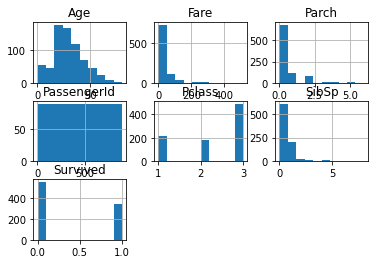

In [7]:
# finally, I take a look at the distrubtions of my data 
df2.hist()

In [8]:
#now, I will take a general look at the characteristics of the data I should test my model by it 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
# I will figure out if there is any NaN values in my data 
df1.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
#Then, I will if there is any NaN values in my data 
df2.duplicated().sum()

0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE5A1A9190>,
      dtype=object)

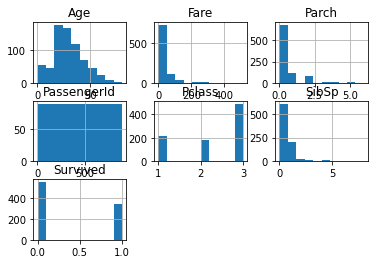

In [11]:
# finally, I take a look at the distrubtions of my data 
df2.hist()

### sumarry of the assessment part 
1. There are Nan values in our data 
2. There are some columns that are not useful 

## Clean part

In [12]:
# I will begin with cleaning the data I should train my model by it 
# in the column "Cabin", more than 70% of its data is missimg, so it is a useful column, so I will drop it 
# the columns below are not useful for my analysis, so I will drop them 
#('Name','Cabin','Ticket', 'PassengerId')
df2.drop({'Name','Cabin','Ticket'}, axis = 1, inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [13]:
# There are missing values in the "Age" column, so I will replace the Nan values by the mean of the "Age" column
df2['Age'].fillna(df2['Age'].mean(), inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [14]:
df2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [15]:
# It's now the turn of the test-data to clean
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [16]:
# in the column "Cabin", more than 70% of its data is missimg, so it is a useful column, so I will drop it 
# the "Ticket" column is not useful for my analysis, so I will drop it 
df1.drop({'Cabin','Ticket'}, axis =1, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


In [17]:
# There are missing values in the "Age" column, so I will replace the Nan values by the mean of the "Age" column
df1['Age'].fillna(df1['Age'].mean(), inplace = True)
df1['Fare'].fillna(df1['Fare'].mean(), inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 29.5+ KB


# The Analysis Part 

## The Exploratory Analysis Part 

Text(0.5, 0, 'Survived (1) Or Not (0)')

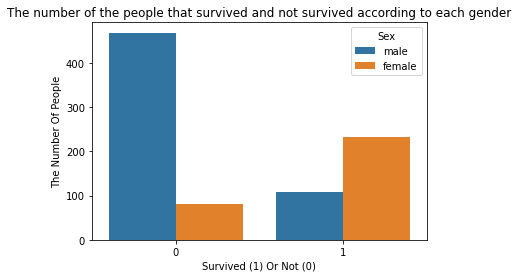

In [18]:
sb.countplot(data= df2, x ='Survived', hue= 'Sex' )
plt.title("The number of the people that survived and not survived according to each gender")
plt.ylabel("The Number Of People")
plt.xlabel("Survived (1) Or Not (0)")

>From this chart, we can see that the gender of the people is effective in their survive 

Text(0.5, 0, 'Survived (1) Or Not (0)')

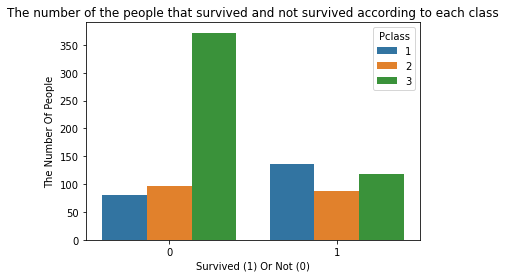

In [19]:
sb.countplot(data= df2, x ='Survived', hue= 'Pclass' )
plt.title("The number of the people that survived and not survived according to each class")
plt.ylabel("The Number Of People")
plt.xlabel("Survived (1) Or Not (0)")

>>From this chart, we can see that the class of the people is effective in their survive 

Text(0.5, 0, 'Survived (1) Or Not (0)')

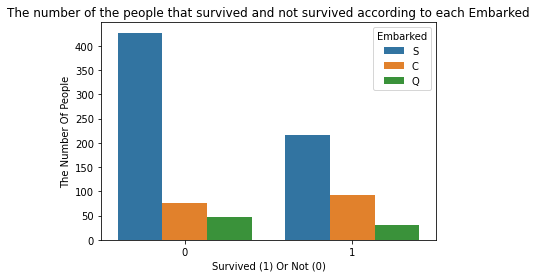

In [20]:
sb.countplot(data= df2, x ='Survived', hue= 'Embarked' )
plt.title("The number of the people that survived and not survived according to each Embarked")
plt.ylabel("The Number Of People")
plt.xlabel("Survived (1) Or Not (0)")

>From this chart, we can see that the class of the people is effective in their survive 

In [21]:
df2.groupby('Survived')['Age'].mean()

Survived
0    30.415100
1    28.549778
Name: Age, dtype: float64

>we can see that the age of the people is not very effective in their survive, but I will use the age in my model 

In [22]:
df2.groupby('Survived')['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

> we can see that the fare the people pay is effective in their survive

## Regression Part 

In [23]:
# I will separate the categorical columns in my train data into numeric columns
df2[['male', 'female']] = pd.get_dummies(df2['Sex'])
df2[['S', 'c','Q']] = pd.get_dummies(df2['Embarked'])
df2.drop({'Sex', 'Embarked'}, axis =1,  inplace = True)
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,female,S,c,Q
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
# I will separate the categorical columns in my test data into numeric columns
df1[['male', 'female']] = pd.get_dummies(df1['Sex'])
df1[['S', 'c','Q']] = pd.get_dummies(df1['Embarked'])
df1.drop({'Sex', 'Embarked'}, axis =1,  inplace = True)
df1.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Fare,male,female,S,c,Q
0,892,3,"Kelly, Mr. James",34.5,0,0,7.8292,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,1,0,0,0,1


In [25]:
# I will import the library that I will use to make my model
from sklearn.ensemble import RandomForestClassifier
# I will assign the independent variables to x and the dependent variable y
y = df2["Survived"]
features = ['Pclass','Age' ,'SibSp' ,'Parch', 'Fare','male','female', 'S', 'c','Q']
X = df2[features]
X_test = df1[features]
# fitting the model
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
# making the predictions
predictions = model.predict(X_test)

In [26]:
# I will get the validation of my model by the following code
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y, cv=5, scoring="accuracy")
score = score.mean()
print(f"Validation Score: {score:.4}")


Validation Score: 0.8272


In [28]:
# saving the model outputs 
output = pd.DataFrame({'PassengerId': df1.PassengerId,'Name':df1.Name, 'Survived': predictions,
                      'Parch': df1.Parch, 'Pclass': df1.Pclass})
output.to_csv('my_submission.csv', index=False)

In [29]:
# seeing the model outputs
df3 = pd.read_csv('my_submission.csv')
df3.head(10)

,PassengerId,Name,Survived,Parch,Pclass
0,892,"Kelly, Mr. James",0,0,3
1,893,"Wilkes, Mrs. James (Ellen Needs)",0,0,3
2,894,"Myles, Mr. Thomas Francis",0,0,2
3,895,"Wirz, Mr. Albert",0,0,3
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,3
5,897,"Svensson, Mr. Johan Cervin",0,0,3
6,898,"Connolly, Miss. Kate",1,0,3
7,899,"Caldwell, Mr. Albert Francis",0,1,2
8,900,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,0,3
9,901,"Davies, Mr. John Samuel",0,0,3
